## 1. 선형회귀 표현하기 

### 공부시간에 따른 성적에 대한 예측선(선형회귀선) 그려보기
* 공부시간은 X, 성적은 y로 주어진 X에 대한 값(변수)가 '공부시간' 하나 이기 때문에 최소제곱법으로 절편과 기울기를 구하자
* 최소 제곱법으로 기울기 a 구하는 공식 -> a = (x-x평균)*(y-y평균)의 합 / (x-x평균)^2의 합
* y절편인 b를 구하는 공식 -> b = y의 평균 -(x의 평균 * 기울기 a)

* 선형회귀 코드로 표현하기

In [31]:
import numpy as np
x= [2,4,6,8]
y = [81,93,91,97]
mx = np.mean(x)
my = np.mean(y)


def gradient_LSM(x, mx, y, my):#LSM은 최소제곱법, gradient는 기울기를 의미
    div = sum([(i-mx)**2 for i in x]) #기울기를 구하기위한 공식 적용위해 분모 먼저 변수화
    d = 0 #기울기 공식의 분자
    for i in range(len(x)):
        d += (x[i]-mx) * (y[i]-my)
    return d/div

#기울기 a
a = gradient_LSM(x,mx,y,my)

#y절편인 b구하기
b = my -(mx*a)

#선형회귀선 함수
print('선형회귀선 함수 y = ',a,'x + ',b)
print('기울기 a : ',a)
print('y 절편 b :', b)

#위 선형회귀선 함수에 x(공부시간)를 적용하여 구해진 성적 리스트 구하기 
y_new = []
for i in x:
    y_new.append(a*i+b)

print('원래의 성적 : ',y,'\n선형회귀함수를 통해 구해진 성적 : ', y_new)

선형회귀선 함수 y =  2.3 x +  79.0
기울기 a :  2.3
y 절편 b : 79.0
원래의 성적 :  [81, 93, 91, 97] 
선형회귀함수를 통해 구해진 성적 :  [83.6, 88.2, 92.8, 97.4]


* 완성된 선형회귀선과, 실제 데이터 그래프로 표현해보기 

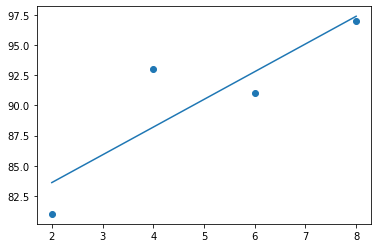

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x,y, label = 'origin')
plt.plot(x,y_new, label = 'new')
plt.show()

## 2. 평균제곱오차 (Mean Squre Error, MSE)
* 앞선 최소제곱법은 입력이 단하나(공부시간) 이었으며, 앞으로의 여러개의 입력을 처리하기에는 무리가 있다. 
* 딥러닝은 대부분 입력값이 여러개인 상황에서 이를 해결하기 위해 실행하기 때문에,
* 여러개의 입력값을 계산할때는 임의의선을 그리고 난 후, 이선이 얼마나 잘그려진지 평가하여 조금씩 수정하는 방법을 사용한다.
* 주어진 선의 오차를 평가하는 '오차 평가 알고리즘'이 필요하다!

#### 평균제곱오차(MSE)- 값을 예측하는 선에 각 입력을 대입하고 얻어진 예측값과 실제값의 차이를 구해, 평균제곱오차를 구한다.

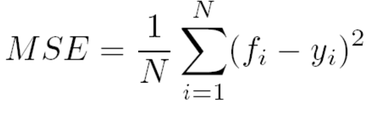


* i 는 x(입력값)이 나오는 순서, N은 x원소의 총 개수를 의미한다,
* f는 예측값 x입력시 나오는 예측값, y는 실제값을 의미함.

###  일단 그리고 조금씩 수정해 나가기
* 가설을 하나 세운뒤, 이 값이 주어진 요건을 충족하는지 판단하여 조금씩 변화를 주고,
* 이변화가 긍정적이면 오차가 최소가 될대가지 이과정을 계속 반복하는 방법. -> 딥러닝을 가능하게 해주는 가장 중요한 원리 중 하나
* 따라서 이과정에선, 나중에 그린 선이 먼저 그린선보다 더 좋은지 나쁜지 판단할 방법이 필요하다. 


* 코딩으로 평균제곱오차 확인해보기

In [43]:
fage_a_b = [3, 76]#아까의 공부시간-성적에 대한 함수에서, 기울기를 3, y절편을 76이라 가정하는 리스트를 생성한다.
x,y#공부시간과 실제 값

def predict(x):
    return fage_a_b[0]*x+fage_a_b[1]
#절편과 기울기를 예측한 리스트로 함수를 만들어 x를 대입 

def mse(y_hat, y):
    return ((y_hat-y)**2).mean()
# 평균 제곱근 공식 - y_hat(예측값)

def mse_val(predict_result, y):
    return mse(np.array(predict_result), np.array(y))
# mse()함수에 데이터를 대입하여 최종값을 구하는 함수 

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print('공부시간 = %.f, 실제접수 = %.f, 예측점수 = %.f'%(x[i], y[i], predict_result[i]))
    
print('mse 최종값 : '+str(mse_val(predict_result, y)))
print('앞서 그은 선형회귀에서의 mse 최종값 : '+ str(mse_val(y_new, y)))

공부시간 = 2, 실제접수 = 81, 예측점수 = 82
공부시간 = 4, 실제접수 = 93, 예측점수 = 88
공부시간 = 6, 실제접수 = 91, 예측점수 = 94
공부시간 = 8, 실제접수 = 97, 예측점수 = 100
mse 최종값 : 11.0
앞서 그은 선형회귀에서의 mse 최종값 : 8.299999999999985


* 이를 통해 우리가 처음 가정한 a=3, b= 76은 오차가 약 11.0 이다. 그리고 좀앞서 선형회귀선을 그으면서 가정된 속성에 대해선 오차가 약 8.3이다. 
* 이제 남은 것은 이 오차를 줄이면서 새로운 선을 긋는것이다. 오차가 최소화 되는 a,b의 값을 구해야 된다. 

## 3. 경사 하강법 